# Multi-variate Rregression model
* Regularization
* Polynomial Feature generation
* Bias-variance trade-off

### Import libraries

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [350]:
N_points = 100
test_set_fraction = 0.3
noise_std=5
noise_magnitude = 2

### Generate random (equivalent to Latin Hypercube sampling done in Optislang) feature vectors

In [351]:
X=np.array(np.random.normal(loc=5,scale=5,size=(N_points,3)))

In [352]:
df=pd.DataFrame(X,columns=['X'+str(l) for l in range(1,4)])

In [353]:
df.head()

,X1,X2,X3
0,3.495119,6.697534,3.851408
1,3.987928,6.727158,7.271218
2,2.206395,6.663613,1.025788
3,6.214477,2.618550,6.264047
4,8.317629,3.333273,0.567009


### Plot the random distributions of input features

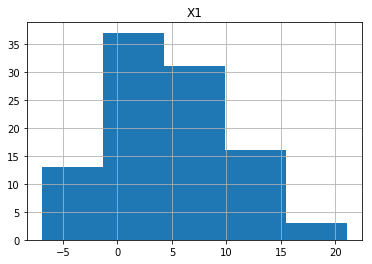

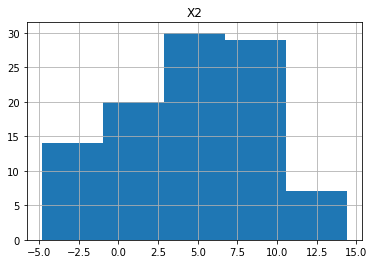

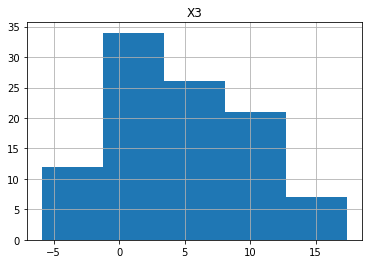

In [354]:
for i in df.columns:
    df.hist(i,bins=5)

### Generate the output variable by analytic function + Gaussian noise (our goal will be to *'learn'* this function)

$$ The\ ground\ truth\ or\ originating\ function\ is\ as\ follows:\  $$
 
$$ y=f(x_1,x_2,x_3,x_4,x_5)= 0.1x_1^2-0.5x_2x_3+0.03x_1x_3^2+0.002x_2^4+0.01x_2x_3^3+\psi(x) $$

$$\psi(x) = {\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}} $$

In [355]:
df['y']=0.1*df['X1']**2-0.5*df['X2']*df['X3']+0.03*df['X1']*df['X3']**2+0.002*df['X2']**4+0.01*df['X2']*df['X3']**3+\
noise_magnitude*np.random.normal(loc=0,scale=2,size=N_points)

In [356]:
df.head(10)

,X1,X2,X3,y
0,3.495119,6.697534,3.851408,-3.696413
1,3.987928,6.727158,7.271218,15.685700
2,2.206395,6.663613,1.025788,0.832765
3,6.214477,2.618550,6.264047,12.432642
4,8.317629,3.333273,0.567009,14.685718
5,7.952192,3.462989,12.916514,92.038881
6,1.388170,1.072732,-1.847645,-4.425604
7,5.288009,6.346881,1.685565,3.591154
8,-3.119536,10.983200,-5.544687,41.277834
9,13.580867,3.501889,17.353052,293.010098


### Plot single-variable scatterplots

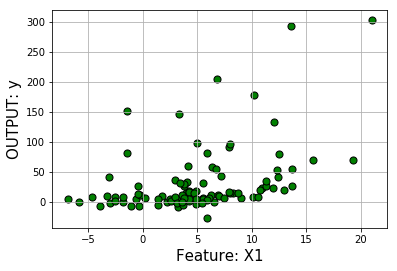

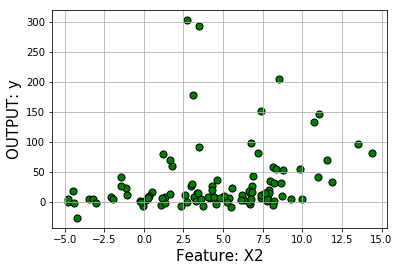

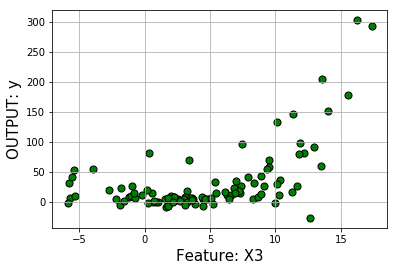

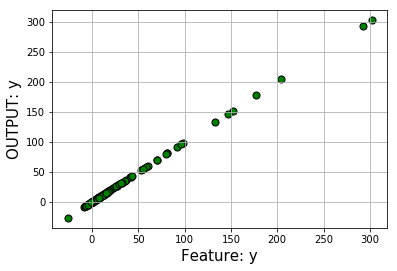

In [357]:
for i in df.columns:
    df.plot.scatter(i,'y', edgecolors=(0,0,0),s=50,c='g')
    plt.grid(True)
    plt.xlabel("Feature: "+i,fontsize=15)
    plt.ylabel("OUTPUT: y",fontsize=15)

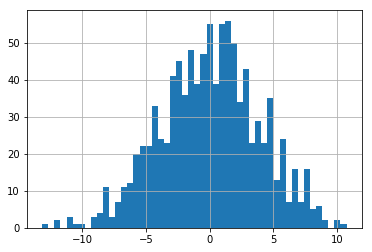

In [377]:
n=2*np.random.normal(loc=0,scale=2,size=1000)
plt.hist(n,bins=50)
plt.grid(True)

### Create polynomial features

In [367]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.002
lasso_nalpha=10
lasso_iter=5000

# Min and max degree of polynomials features to consider
degree_min = 1
degree_max = 8

r2_scores=[]
train_scores=[]
models =[]
error_test=[]
error_train=[]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2','X3']], df['y'], 
                                                    test_size=test_set_fraction)

# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation
# Run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree,interaction_only=False), 
                          LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
    
    #model = make_pipeline(PolynomialFeatures(degree,interaction_only=False), 
                          #LinearRegression(normalize=True))
                                                                  
    model.fit(X_train,y_train)
    
    test_pred = np.array(model.predict(X_test))
    train_pred = np.array(model.predict(X_train))
    
    RMSE_test=np.sqrt(np.sum(np.square(test_pred-y_test)))
    RMSE_train=np.sqrt(np.sum(np.square(train_pred-y_train)))
    
    error_test.append(RMSE_test)
    error_train.append(RMSE_train)
    
    test_score = model.score(X_test,y_test)
    r2_scores.append(test_score)
    
    train_score = model.score(X_train,y_train)
    train_scores.append(train_score)
    
    models.append(model)

In [368]:
r2_scores

[0.39102236812405711,
 0.73312622314282938,
 0.97122937654370134,
 0.99308368612040576,
 0.99153533143703609,
 0.99033346626334284,
 0.97563199145344492,
 0.95584240787750552]

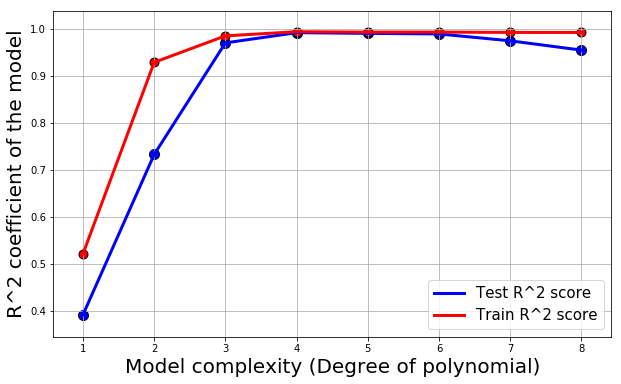

In [369]:
plt.figure(figsize=(10,6))
plt.scatter([d for d in range(degree_min,degree_max+1)],r2_scores,s=100,edgecolors='k',c='blue')
plt.scatter([d for d in range(degree_min,degree_max+1)],train_scores,s=80,edgecolors='k',c='red')
plt.plot([d for d in range(degree_min,degree_max+1)],r2_scores,lw=3,c='blue')
plt.plot([d for d in range(degree_min,degree_max+1)],train_scores,lw=3,c='red')
plt.legend(['Test R^2 score', 'Train R^2 score'],fontsize=15)
plt.xlabel("Model complexity (Degree of polynomial)",fontsize=20)
plt.ylabel("R^2 coefficient of the model",fontsize=20)
plt.grid(True)

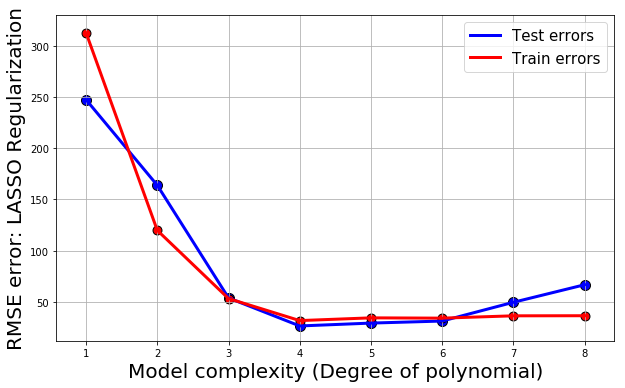

In [371]:
plt.figure(figsize=(10,6))
plt.scatter([d for d in range(degree_min,degree_max+1)],error_test,s=100,edgecolors='k',c='blue')
plt.scatter([d for d in range(degree_min,degree_max+1)],error_train,s=80,edgecolors='k',c='red')
plt.plot([d for d in range(degree_min,degree_max+1)],error_test,lw=3,c='blue')
plt.plot([d for d in range(degree_min,degree_max+1)],error_train,lw=3,c='red')
plt.legend(['Test errors', 'Train errors'],fontsize=15)
plt.xlabel("Model complexity (Degree of polynomial)",fontsize=20)
plt.ylabel("RMSE error: LASSO Regularization",fontsize=20)
plt.grid(True)

### Printing only the non-zero coefficients of the *metamodel*